In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filmes = pd.read_csv('/content/drive/MyDrive/Datasets/IMDB-PT-BR/ml-latest-small/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes = filmes.set_index('filmeId')
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [4]:
notas = pd.read_csv('/content/drive/MyDrive/Datasets/IMDB-PT-BR/ml-latest-small/ratings.csv')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# Primeira tentativa de recomendação: heurística de total de votos

In [6]:
total_de_votos = notas['filmeId'].value_counts()
total_de_votos.head()

356     329
318     317
296     307
593     279
2571    278
Name: filmeId, dtype: int64

In [7]:
filmes['total_de_votos'] = total_de_votos

In [8]:
filmes.head()

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [9]:
filmes.sort_values('total_de_votos', ascending=False).head()

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


In [10]:
notas_medias = notas.groupby('filmeId').mean()['nota']
notas_medias.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [11]:
filmes['nota_media'] = notas_medias
filmes.sort_values("total_de_votos", ascending=False).head()

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446


# Uma segunda heurística: filtrando votos e nota média

In [12]:
filmes.sort_values('nota_media', ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [13]:
filmes.query('total_de_votos >= 10').sort_values('nota_media', ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


In [14]:
filmes_com_mais_de_50_votos = filmes.query('total_de_votos >= 50')
filmes_com_mais_de_50_votos.sort_values('nota_media', ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


In [15]:
eu_assisti = [1, 21, 19, 10,11, 7, 2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [16]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query("generos=='Adventure|Children|Fantasy'")
aventura_infantil_e_fantasia.drop(eu_assisti, errors='ignore').sort_values("nota_media", ascending=False).head()

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


# Procurar usuários "similares"

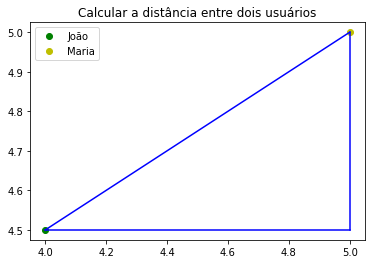

In [46]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.legend(["João", "Maria"])
plt.title("Calcular a distância entre dois usuários")

plt.plot([4, 5], [4.5, 4.5], color="b", linestyle="-")
plt.plot([4, 5], [4.5, 5], color="b", linestyle="-")
plt.plot([5, 5], [4.5, 5], color="b", linestyle="-")

In [18]:
import numpy as np
joao = np.array([4, 4.5])
maria = np.array([5,5])
joaquina = np.array([3.5,4.5])

In [19]:
from math import sqrt
def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y)

In [20]:
pitagoras(joao,maria)

1.118033988749895

In [21]:
def pitagoras(a,b):
  return np.linalg.norm(a-b)

In [22]:
print(pitagoras(joao,maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


# Distância entre usuários do dataset

In [23]:
def distancia_de_vetores(a,b):
  return np.linalg.norm(a-b)

In [24]:
def notas_do_usuario(usuario):
  notas_do_usuario = notas.query("usuarioId==%d" % usuario)
  notas_do_usuario = notas_do_usuario[["filmeId","nota"]].set_index("filmeId")
  return notas_do_usuario

In [25]:
usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

In [26]:
usuario1.head()

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [27]:
usuario4.head()

,nota
filmeId,
21,3.0
32,2.0
45,3.0
47,2.0
52,3.0


In [28]:
diferencas = usuario1.join(usuario4, lsuffix="_esquerda", rsuffix="_direita").dropna()
distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

11.135528725660043

In [29]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [30]:
distancia_de_usuarios(1,4)

[1, 4, 11.135528725660043]

In [31]:
quantidade_de_usuarios = len(notas['usuarioId'].unique())
print("Temos {} usuarios".format(quantidade_de_usuarios))

Temos 610 usuarios


In [32]:
def distancia_de_todos(voce_id):
  todos_os_usuarios = notas['usuarioId'].unique()
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
  return distancias

In [33]:
distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


In [34]:
notas_do_usuario(1).join(notas_do_usuario(5), lsuffix="_1", rsuffix="_5").dropna()

,nota_1,nota_5
filmeId,,
1,4.0,4.0
50,5.0,4.0
110,4.0,4.0
296,3.0,5.0
316,3.0,2.0
349,4.0,3.0
367,4.0,4.0
457,5.0,4.0
527,5.0,5.0


# Usuários sem filmes em comum são colocados bem distantes um dos outros

In [35]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()

  if(len(diferencas) < minimo):
    return [usuario_id1, usuario_id2, 100000]

  distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [36]:
distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


In [37]:
def mais_proximos_de(voce_id):
  distancias = distancia_de_todos(voce_id)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias

In [38]:
mais_proximos_de(1)

,voce,distancia
outra_pessoa,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000
...,...,...
190,1,100000.000000
60,1,100000.000000
576,1,100000.000000


# Gerando recomendações baseado em um usuário

## Parâmetros para teste

In [47]:
def mais_proximos_de(voce_id, n = None):
  distancias = distancia_de_todos(voce_id, n = n)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias

In [48]:
def distancia_de_todos(voce_id, n = None):
  todos_os_usuarios = notas['usuarioId'].unique()
  if n:
    todos_os_usuarios = todos_os_usuarios[:n]
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
  return distancias

In [49]:
mais_proximos_de(1, n = 50)

TypeError: ignored

In [50]:

def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  
  if(len(diferencas) < minimo):
    return None
  
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [51]:
def distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = None):
  todos_os_usuarios = notas['usuarioId'].unique()
  if numero_de_usuarios_a_analisar:
    todos_os_usuarios = todos_os_usuarios[:numero_de_usuarios_a_analisar]
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = list(filter(None, distancias))
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
  return distancias

In [52]:
def mais_proximos_de(voce_id, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias

In [53]:
mais_proximos_de(1, numero_de_usuarios_a_analisar = 50)

,voce,distancia
outra_pessoa,,
49,1,1.000000
9,1,1.000000
25,1,1.414214
13,1,1.414214
30,1,1.802776
35,1,2.236068
26,1,2.236068
46,1,3.316625
8,1,3.741657


In [54]:
def sugere_para(voce, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  similar = similares.iloc[0].name
  notas_do_similar = notas_do_usuario(similar)
  notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors='ignore')
  recomendacoes = notas_do_similar.sort_values("nota", ascending=False)
  return recomendacoes.join(filmes)

In [55]:
sugere_para(1, numero_de_usuarios_a_analisar=50).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1200,4.5,Aliens (1986),Action|Adventure|Horror|Sci-Fi,126.0,3.964286
4022,4.5,Cast Away (2000),Drama,100.0,3.700000
47099,4.5,"Pursuit of Happyness, The (2006)",Drama,46.0,3.793478
79132,4.5,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
109487,4.5,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151


In [56]:
sugere_para(1).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984


# Sugerindo baseado em vários usuários

In [57]:
def mais_proximos_de(voce_id, n_mais_proximos=10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias.head(n_mais_proximos)

In [58]:
mais_proximos_de(1, n_mais_proximos = 2, numero_de_usuarios_a_analisar=300)

,voce,distancia
outra_pessoa,,
77,1,0.0
258,1,1.0


In [59]:
def sugere_para(voce, n_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, n_mais_proximos = n_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
  recomendacoes = recomendacoes.sort_values("nota", ascending=False)
  return recomendacoes.join(filmes)

In [60]:
sugere_para(1, numero_de_usuarios_a_analisar = 50).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,12.0,3.875000
68157,5.0,Inglourious Basterds (2009),Action|Drama|War,88.0,4.136364
475,5.0,In the Name of the Father (1993),Drama,25.0,4.300000
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
7153,5.0,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185.0,4.118919


In [61]:
sugere_para(1, numero_de_usuarios_a_analisar = 300).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,12.0,3.875000
802,5.0,Phenomenon (1996),Drama|Romance,46.0,3.336957
534,5.0,Shadowlands (1993),Drama|Romance,14.0,3.607143
1172,5.0,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,34.0,4.161765
515,5.0,"Remains of the Day, The (1993)",Drama|Romance,24.0,3.604167


In [62]:
sugere_para(1).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1704,5.0,Good Will Hunting (1997),Drama|Romance,141.0,4.078014
57504,5.0,"Girl Who Leapt Through Time, The (Toki o kaker...",Animation|Comedy|Drama|Romance|Sci-Fi,10.0,4.100000
38304,5.0,No Direction Home: Bob Dylan (2005),Documentary,4.0,4.625000
48394,5.0,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller,81.0,3.814815
2300,5.0,"Producers, The (1968)",Comedy,33.0,3.969697


In [63]:
def knn(voce_id, k_mais_proximos=10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias.head(k_mais_proximos)

In [64]:
def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
  recomendacoes = recomendacoes.sort_values("nota", ascending=False)
  return recomendacoes.join(filmes)

# Testar um novo usuário

In [65]:
filmes.loc[[122904, 1246, 2529, 2329 , 2324 , 1 , 7 , 2 ,1196, 260]]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54.0,3.833333
1246,Dead Poets Society (1989),Drama,86.0,3.959302
2529,Planet of the Apes (1968),Action|Drama|Sci-Fi,56.0,3.803571
2329,American History X (1998),Crime|Drama,129.0,4.217054
2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,88.0,4.147727
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211.0,4.215640


In [66]:
def novo_usuario(dados):
  novo_usuario = notas['usuarioId'].max()+1
  notas_do_usuario_novo = pd.DataFrame(dados, columns=["filmeId", "nota"])
  notas_do_usuario_novo['usuarioId'] = novo_usuario
  return pd.concat([notas, notas_do_usuario_novo])

In [67]:
notas = novo_usuario([[122904,2],[1246,5],[2529,2],[2329,5],[2324,5],[1,2],[7,0.5],[2,2],[1196,1],[260,1]])
notas.tail()

,usuarioId,filmeId,nota,momento
5,611,1,2.0,NaN
6,611,7,0.5,NaN
7,611,2,2.0,NaN
8,611,1196,1.0,NaN
9,611,260,1.0,NaN


In [68]:
sugere_para(8621).head()

KeyError: ignored

# Utilize somente para as notas de filme com mais de 50 votos

In [69]:
notas = notas.set_index("filmeId").loc[filmes_com_mais_de_50_votos.index]
notas.head()

,usuarioId,nota,momento
filmeId,,,
1,1,4.0,9.649827e+08
1,5,4.0,8.474350e+08
1,7,4.5,1.106636e+09
1,15,2.5,1.510578e+09
1,17,4.5,1.305696e+09


In [70]:

notas = notas.reset_index()
notas.head()

,filmeId,usuarioId,nota,momento
0,1,1,4.0,9.649827e+08
1,1,5,4.0,8.474350e+08
2,1,7,4.5,1.106636e+09
3,1,15,2.5,1.510578e+09
4,1,17,4.5,1.305696e+09


In [71]:
sugere_para(8621).head()

KeyError: ignored

In [72]:
def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
  aparicoes = notas_dos_similares.groupby("filmeId").count()[['nota']]
  
  filtro_minimo = k_mais_proximos / 2
  recomendacoes = recomendacoes.join(aparicoes, lsuffix="_media_dos_usuarios", rsuffix="_aparicoes_nos_usuarios")
  recomendacoes = recomendacoes.query("nota_aparicoes_nos_usuarios >= %.2f" % filtro_minimo)  
  recomendacoes = recomendacoes.sort_values("nota_media_dos_usuarios", ascending=False)
  recomendacoes = recomendacoes.drop(filmes_que_voce_ja_viu,errors='ignore')
  return recomendacoes.join(filmes)

In [73]:

def knn(voce_id, k_mais_proximos=10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id, errors='ignore')
  return distancias.head(k_mais_proximos)

In [74]:
sugere_para(1, numero_de_usuarios_a_analisar=500)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,
318,4.583333,6,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022


In [77]:
sugere_para(610).head(10)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,


In [78]:
sugere_para(610, k_mais_proximos=20).head(10)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,
